In [2]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Disaster forecast data/natural_disasters_2024.csv')
df.head()


,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [5]:
#Coverting date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.describe()

,Disaster_ID,Magnitude,Date,Fatalities,Economic_Loss($)
count,10000.00000,10000.000000,10000,10000.000000,1.000000e+04
mean,5000.50000,5.559173,2024-07-27 07:30:00,4984.928900,5.049752e+08
min,1.00000,1.000656,2024-01-01 00:00:00,0.000000,1.036597e+06
25%,2500.75000,3.263217,2024-04-14 03:45:00,2481.750000,2.636352e+08
50%,5000.50000,5.589578,2024-07-27 07:30:00,4947.000000,5.078407e+08
75%,7500.25000,7.829268,2024-11-08 11:15:00,7511.250000,7.527256e+08
max,10000.00000,9.999671,2025-02-20 15:00:00,9999.000000,9.998528e+08
std,2886.89568,2.619304,NaN,2900.114029,2.861325e+08


In [7]:
df.dtypes

,0
Disaster_ID,int64
Disaster_Type,object
Location,object
Magnitude,float64
Date,datetime64[ns]
Fatalities,int64
Economic_Loss($),float64


In [8]:
#Encoding categorical variables like 'Disaster_type' and 'Location'
le_disaster = LabelEncoder()
le_location = LabelEncoder()
df['Disaster_Type'] = le_disaster.fit_transform(df['Disaster_Type'])
df['Location'] = le_location.fit_transform(df['Location'])

In [9]:
df.isnull().sum()

,0
Disaster_ID,0
Disaster_Type,0
Location,0
Magnitude,0
Date,0
Fatalities,0
Economic_Loss($),0


In [10]:
#Handling missing values(if any) using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Magnitude'] = imputer.fit_transform(df[['Magnitude']])

In [11]:
#Standardize numerical columns for better performance in same models
scaler = StandardScaler()
#Fitting and transform the selected columns
scaled_data = scaler.fit_transform(df[['Magnitude', 'Fatalities', 'Economic_Loss($)']])
#Assigning the transformed values back to the dataframe
df[['Magnitude', 'Fatalities', 'Economic_Loss($)']] = scaled_data

In [12]:
#Splitting the data
#Feature(X) will include columns like Disaster_Type, Location, Magnitude, and Date
#Target(y): Will predict Fatalities and Economic_Loss
X = df.drop(['Fatalities', 'Economic_Loss($)', 'Disaster_ID'], axis = 1)
y_fatalities = df['Fatalities']
y_economic_loss = df['Economic_Loss($)']
#Splitting data into train and test split
X_train, X_test, y_train_fatalities, y_test_fatalities = train_test_split(X, y_fatalities, test_size = 0.2, random_state = 42)
X_train_loss, X_test_loss, y_train_loss, y_test_loss = train_test_split(X, y_economic_loss, test_size = 0.2, random_state = 42)

Exploratory Data Analysis(EDA)

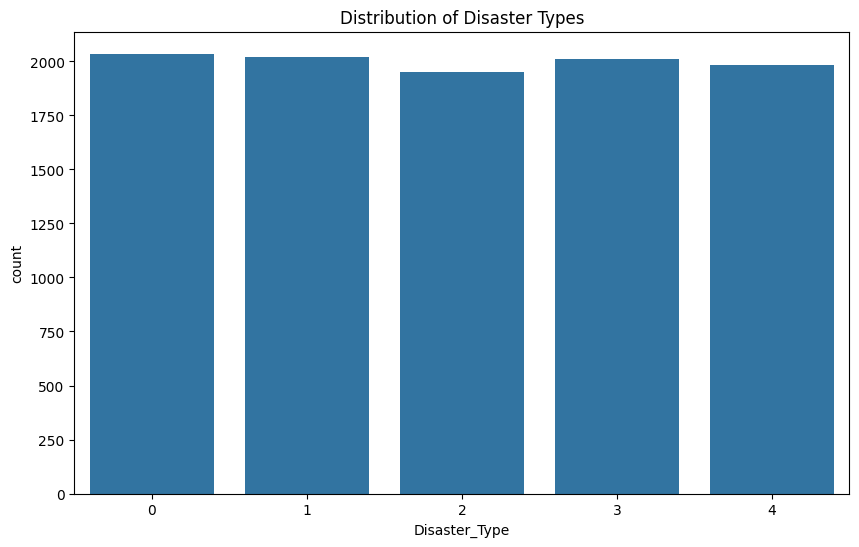

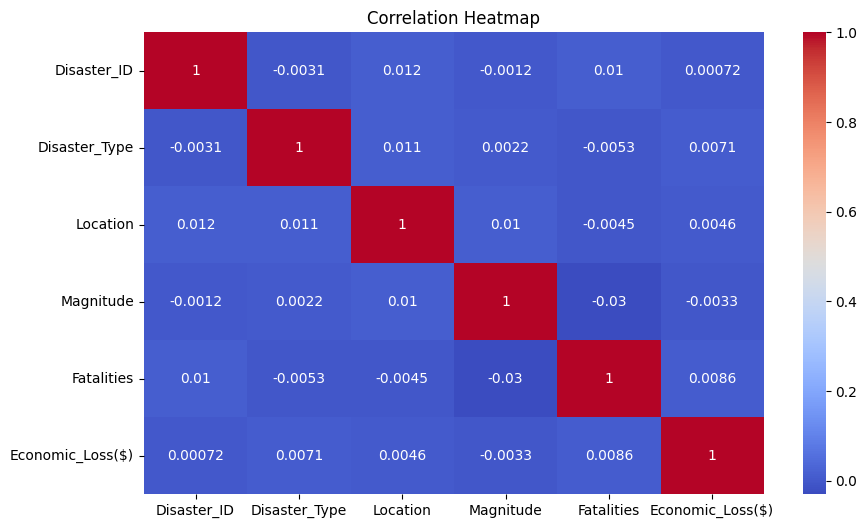

<ipython-input-13-fdee1af109a6>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Date').resample('M').count()['Disaster_ID'].plot()


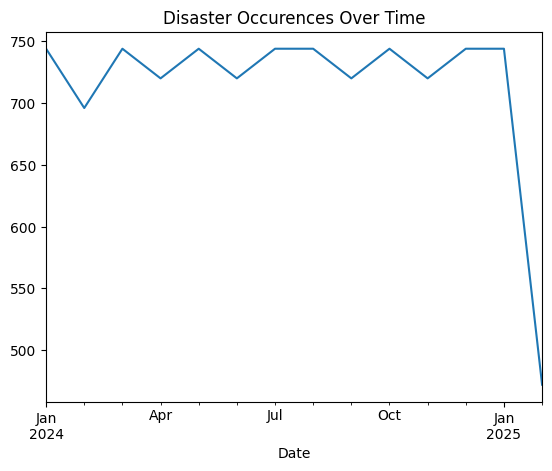

In [13]:
#Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt
#Distribution of disaster typest
plt.figure(figsize = (10, 6))
sns.countplot(x='Disaster_Type', data = df)
plt.title('Distribution of Disaster Types')
plt.show()
#Correlation heatmap
plt.figure(figsize = (10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
#Time-Series Analysis
#Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date']) # Convert to Datetime

df.set_index('Date').resample('M').count()['Disaster_ID'].plot()
plt.title('Disaster Occurences Over Time')
plt.show()

Baseline Machine Learning model

In [15]:
#Linear Regression for economic loss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
#Initializing the model
lr = LinearRegression()
#Convert 'Date' column back to numerical representation for Linear Regression:
#Extract features from the 'Date' column
X_train_loss['Year'] = X_train_loss['Date'].dt.year
X_train_loss['Month'] = X_train_loss['Date'].dt.month
X_train_loss['Day'] = X_train_loss['Date'].dt.day

#Drop the original 'Date' column
X_train_loss = X_train_loss.drop('Date', axis=1)

#Now, fit the model
lr.fit(X_train_loss, y_train_loss)


#Predict and Evaluate
X_test_loss['Year'] = X_test_loss['Date'].dt.year
X_test_loss['Month'] = X_test_loss['Date'].dt.month
X_test_loss['Day'] = X_test_loss['Date'].dt.day
X_test_loss = X_test_loss.drop('Date', axis=1)

y_pred_lr = lr.predict(X_test_loss)
mse_lr = mean_squared_error(y_test_loss, y_pred_lr)
r2_lr = r2_score(y_test_loss, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}')
print(f'Linear Regression - R2 Score: {r2_lr}')

Linear Regression - MSE: 1.0253175951041575
Linear Regression - R2 Score: -0.003699052183806506


Random Forest for Fatalities

In [21]:
from sklearn.ensemble import RandomForestRegressor

#Initialise and train the model
rf = RandomForestRegressor(random_state=42)
# Check if 'Date' column exists in X_train before proceeding
if 'Date' in X_train.columns:
    #Ensure X_train has the same feature engineering as in your Linear Regression code:
    X_train['Year'] = X_train['Date'].dt.year
    X_train['Month'] = X_train['Date'].dt.month
    X_train['Day'] = X_train['Date'].dt.day
    X_train = X_train.drop('Date', axis=1)  # Drop original 'Date'
else:
    print("Warning: 'Date' column not found in X_train. Feature engineering skipped.")

rf.fit(X_train, y_train_fatalities)

#Predict and Evaluate
#Apply the same feature engineering to X_test:
if 'Date' in X_test.columns:
    X_test['Year'] = X_test['Date'].dt.year
    X_test['Month'] = X_test['Date'].dt.month
    X_test['Day'] = X_test['Date'].dt.day
    X_test = X_test.drop('Date', axis=1)  # Drop original 'Date'
else:
    print("Warning: 'Date' column not found in X_test. Feature engineering skipped.")


y_pred_rf = rf.predict(X_test)  # Predict fatalities
mse_rf = mean_squared_error(y_test_fatalities, y_pred_rf)
r2_rf = r2_score(y_test_fatalities, y_pred_rf)


print(f'Random Forest - MSE: {mse_rf}')
print(f'Random Forest - R2 Score: {r2_rf}')

Random Forest - MSE: 1.111035261696997
Random Forest - R2 Score: -0.08610172070064248


Support Vector Machines for economic loss

In [22]:
from sklearn.svm import SVR
#Iniitialising and training the model
svr = SVR(kernel = 'rbf', C=10, gamma = 'auto')
svr.fit(X_train_loss, y_train_loss)

#Predict and Evaluate
y_pred_svr = svr.predict(X_test_loss)
mse_svr = mean_squared_error(y_test_loss, y_pred_svr)
r2_svr = r2_score(y_test_loss, y_pred_svr)

print(f'Support Vector Machines - MSE: {mse_svr}')
print(f'Support Vector Machines - R2 Score: {r2_svr}')



Support Vector Machines - MSE: 1.536370318315622
Support Vector Machines - R2 Score: -0.5039763675762072


Neural Networks (MLP) for fatalities

In [23]:
from sklearn.neural_network import MLPRegressor
#Initializing and training the MPL
mlp = MLPRegressor(hidden_layer_sizes=(50, 100), activation = 'relu', solver = 'adam', max_iter = 500, random_state = 42)
mlp.fit(X_train, y_train_fatalities)

#Predict and Evaluate
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test_fatalities, y_pred_mlp)
r2_mlp = r2_score(y_test_fatalities, y_pred_mlp)

print(f'Neural Networks - MSE: {mse_mlp}')
print(f'Neural Networks - R2 Score: {r2_mlp}')

Neural Networks - MSE: 1.2398799831026384
Neural Networks - R2 Score: -0.2120549450907665


Gradient Boosting for economic loss

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

#Initializing and training the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_loss, y_train_loss)

#Predicting and evaluating
y_pred_gbr = gbr.predict(X_test_loss)
mse_gbr = mean_squared_error(y_test_loss, y_pred_gbr)
r2_gbr = r2_score(y_test_loss, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}')
print(f'Gradient Boosting - R2 Score: {r2_gbr}')

Gradient Boosting - MSE: 1.0362713836113384
Gradient Boosting - R2 Score: -0.014421883036389804


Hyperparameter tuning for Random forest

In [25]:
from sklearn.model_selection import GridSearchCV

#Defining parameter grid
param_grid_rf = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5, 10]
}
#Iniliazing GridSearchCV
grid_search_rf = GridSearchCV(estimator = RandomForestRegressor(random_state=42), param_grid = param_grid_rf, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_rf.fit(X_train_loss, y_train_loss)

#Best Parameters
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


Hyperparameter tuning for MLP

In [26]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}
#Initializing Grid Search CV
grid_search_mlp = GridSearchCV(estimator=MLPRegressor(max_iter=1000, random_state=42), param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train, y_train_fatalities)

# Best parameters
print("Best parameters for MLP:", grid_search_mlp.best_params_)

Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'solver': 'sgd'}


Best Random Forest model

In [27]:
rf_best = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200, random_state=42)
rf_best.fit(X_train, y_train_fatalities)
y_rf_best_pred = rf_best.predict(X_test)
mse_rf_best = mean_squared_error(y_test_fatalities, y_rf_best_pred)
r2_rf_best = r2_score(y_test_fatalities, y_rf_best_pred)
print(f'Best Random Forest - MSE: {mse_rf_best}')
print(f'Best Random Forest - R2 Score: {r2_rf_best}')

Best Random Forest - MSE: 1.0386437698942108
Best Random Forest - R2 Score: -0.015334818405389417


Best MLP Model

In [29]:
mlp_best = MLPRegressor(activation='tanh', alpha=0.001, hidden_layer_sizes=(50,), learning_rate='adaptive', solver='sgd', random_state=42)
mlp_best.fit(X_train, y_train_fatalities)
y_mlp_best_pred = mlp_best.predict(X_test)
mse_mlp_best = mean_squared_error(y_test_fatalities, y_mlp_best_pred)
r2_mlp_best = r2_score(y_test_fatalities, y_mlp_best_pred)
print(f'Best MLP - MSE: {mse_mlp_best}')
print(f'Best MLP - R2 Score: {r2_mlp_best}')

Best MLP - MSE: 1.0231418246350337
Best MLP - R2 Score: -0.00018076344363859853


In [32]:
import xgboost as xgb
from xgboost import XGBRegressor
# Setting up the parameter grid for tuning XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0]
}

# XGBoost model initialization
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# GridSearchCV for hyperparameter tuning
xgb_grid_loss = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)
xgb_grid_fatalities = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Fitting the model to predict Economic Loss
xgb_grid_loss.fit(X_train_loss, y_train_loss)
best_xgb_loss = xgb_grid_loss.best_estimator_

# Fitting the model to predict Fatalities
xgb_grid_fatalities.fit(X_train, y_train_fatalities)
best_xgb_fatalities = xgb_grid_fatalities.best_estimator_

# Printing best parameters
print("Best parameters for Economic Loss:", xgb_grid_loss.best_params_)
print("Best parameters for Fatalities:", xgb_grid_fatalities.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for Economic Loss: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best parameters for Fatalities: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Best XGB Model

In [34]:
# Predicting for the test data
y_pred_loss_xgb = best_xgb_loss.predict(X_test_loss)
y_pred_fatalities_xgb = best_xgb_fatalities.predict(X_test)

# Calculating performance metrics
mse_xgb_loss = mean_squared_error(y_test_loss, y_pred_loss_xgb)
r2_xgb_loss = r2_score(y_test_loss, y_pred_loss_xgb)

mse_xgb_fatalities = mean_squared_error(y_test_fatalities, y_pred_fatalities_xgb)
r2_xgb_fatalities = r2_score(y_test_fatalities, y_pred_fatalities_xgb)

print(f"XGBoost MSE for Economic Loss: {mse_xgb_loss}")
print(f"XGBoost R² for Economic Loss: {r2_xgb_loss}")
print(f"XGBoost MSE for Fatalities: {mse_xgb_fatalities}")
print(f"XGBoost R² for Fatalities: {r2_xgb_fatalities}")


XGBoost MSE for Economic Loss: 1.0234958788908177
XGBoost R² for Economic Loss: -0.0019157463618759696
XGBoost MSE for Fatalities: 1.0259745104967548
XGBoost R² for Fatalities: -0.0029498789656072777


Model Comparison

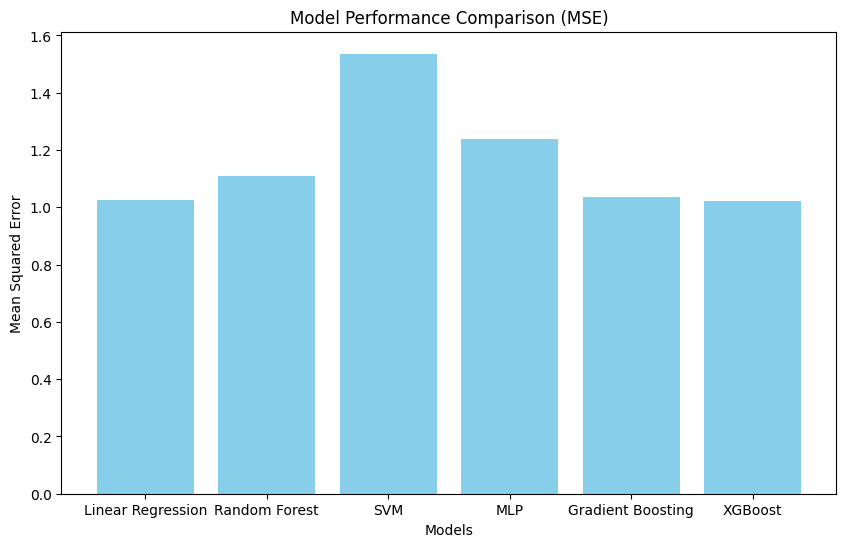

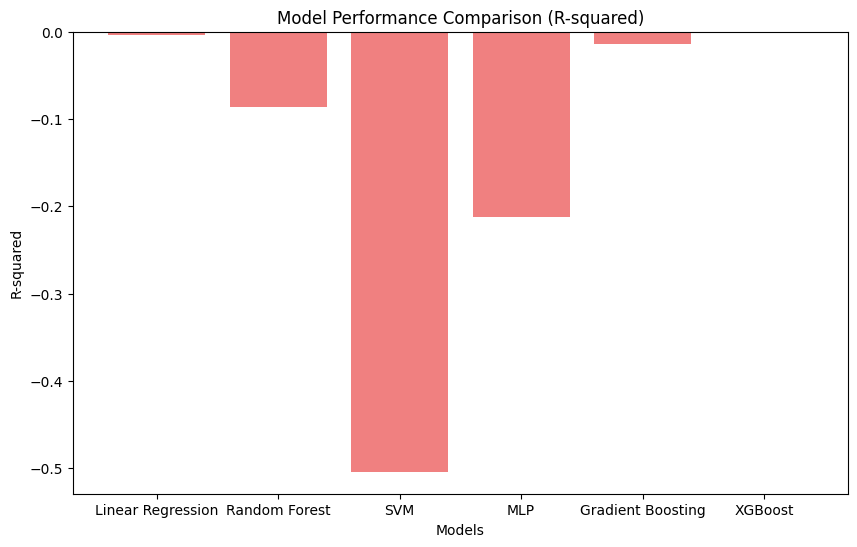

In [38]:
import matplotlib.pyplot as plt

# Define models and corresponding MSE and R-squared values
models = ['Linear Regression', 'Random Forest', 'SVM', 'MLP', 'Gradient Boosting', 'XGBoost']
# Adjust mse_values and r2_values to match the length of models by either removing one of the mse_xgb or r2_xgb value or adding extra model names in models
mse_values = [mse_lr, mse_rf, mse_svr, mse_mlp, mse_gbr, mse_xgb_loss]  # Include only mse_xgb_loss for example
r2_values = [r2_lr, r2_rf, r2_svr, r2_mlp, r2_gbr, r2_xgb_loss]  # Include only r2_xgb_loss for example


# MSE Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Performance Comparison (MSE)')

# R2_Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='lightcoral')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('Model Performance Comparison (R-squared)')

plt.show()